In [71]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [72]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

s_vals = np.linspace(0.2, 20.0, 1001)
# s_vals = np.linspace(1.0, 5.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# # get the range of k values
# k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = fft.fftshift(k_vals)
# # k_vals = 2 * np.pi * k_vals
# # print(k_vals)
# print(f"shape of k_vals : {k_vals.shape}")

In [73]:
dk = 1/(r_vals[-1]-r_vals[0])
# we need only the positive k values
k_vals = np.linspace(0.0, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi*dk, np.pi*dk, (r_vals.shape[0]))
# k_vals = np.linspace(-np.pi/dk, np.pi/dk, r_vals.shape[0])
# print(k_vals)
print(k_vals.shape)

(500,)


In [74]:
alpha0 = 0.5
d0 = 2.0

In [75]:
u_test = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)

u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)


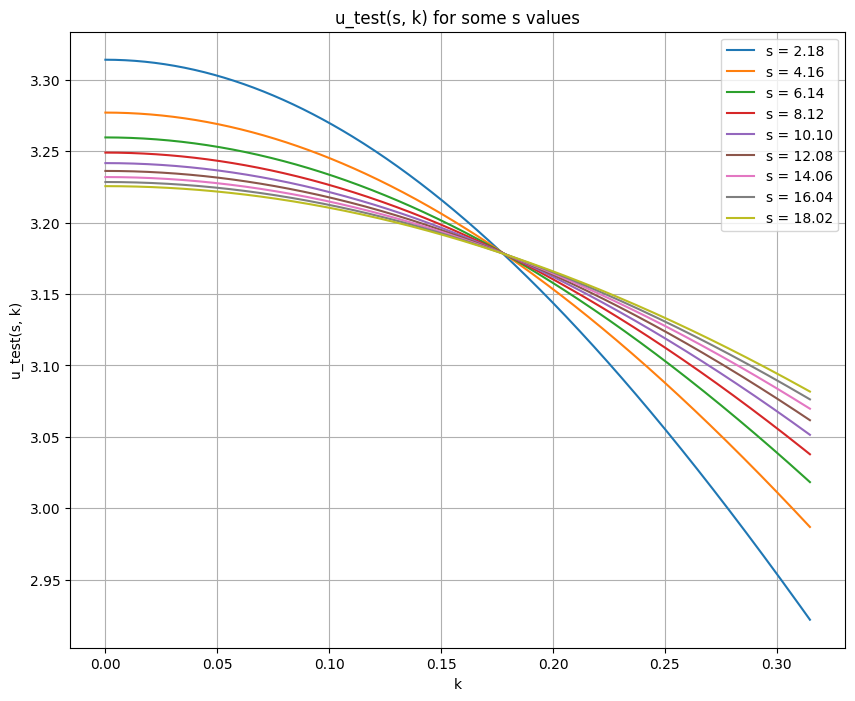

In [76]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha}+Dk^2}$

In [77]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(1000, 500)


average difference for s = 0.60 : 0.011202418035418145


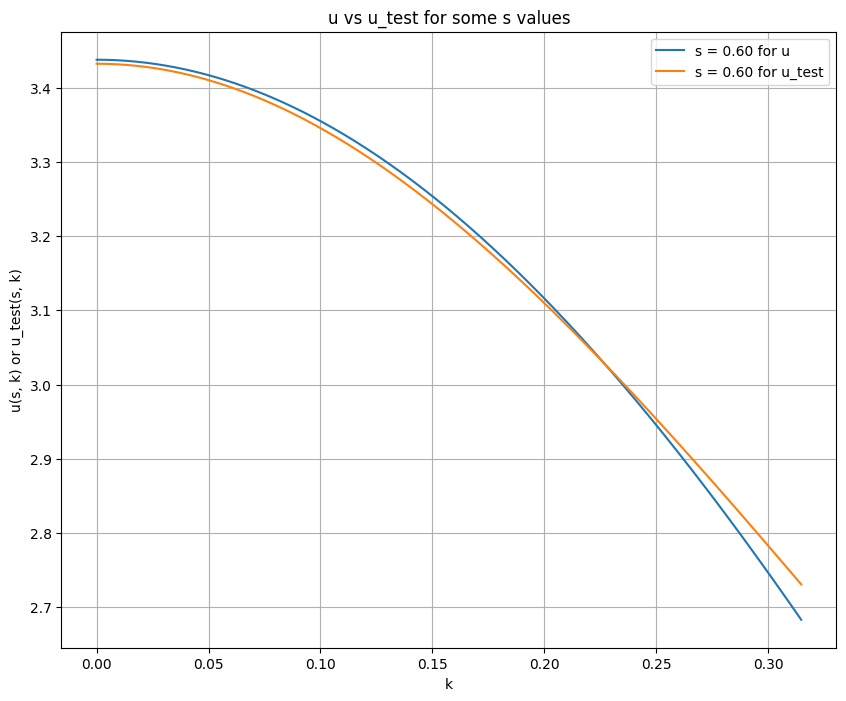

average difference for s = 0.99 : 0.016029580701275324


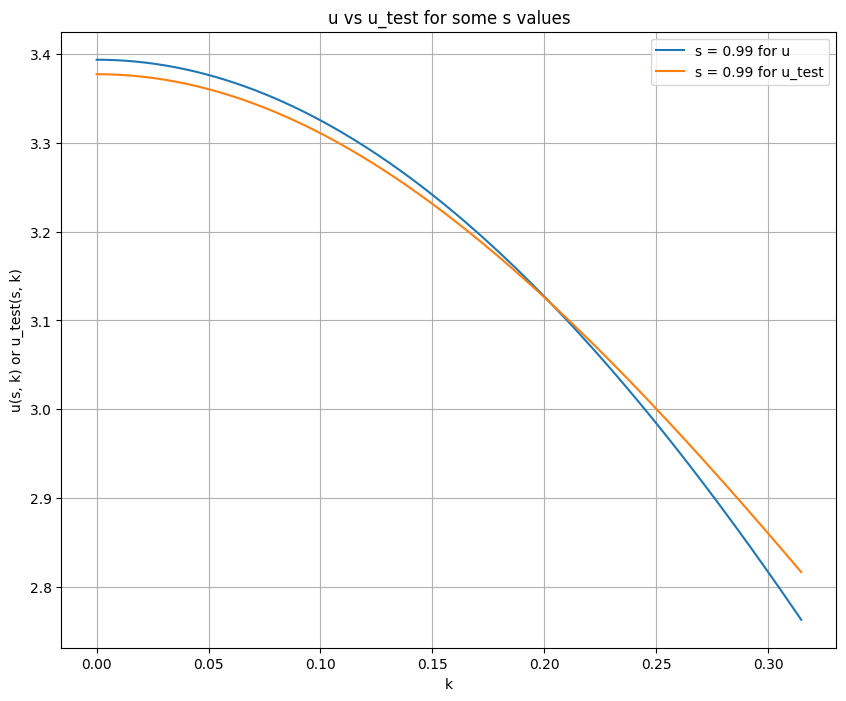

average difference for s = 1.39 : 0.014667395322258726


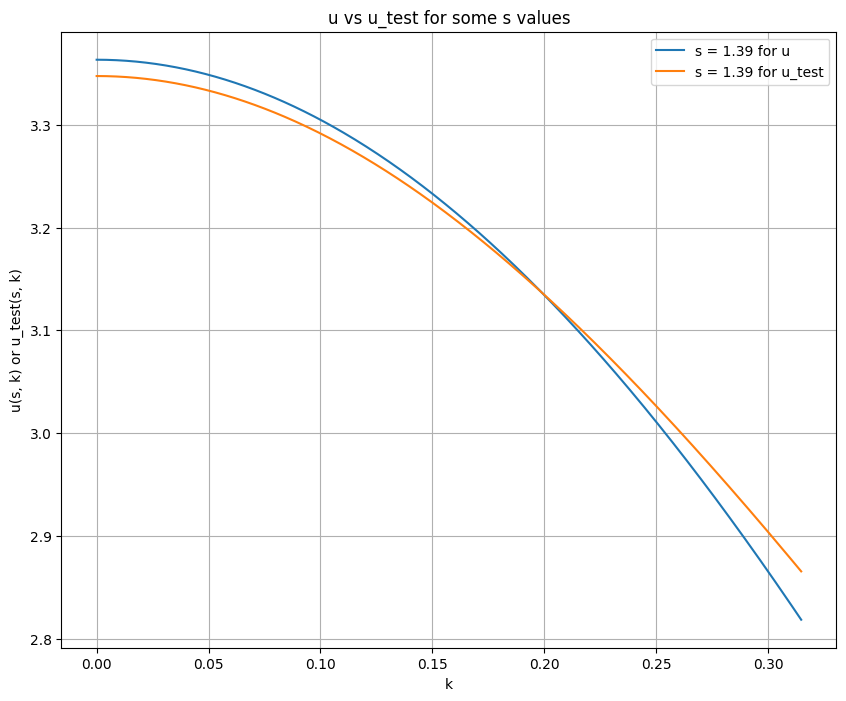

average difference for s = 1.78 : 0.01314359629542642


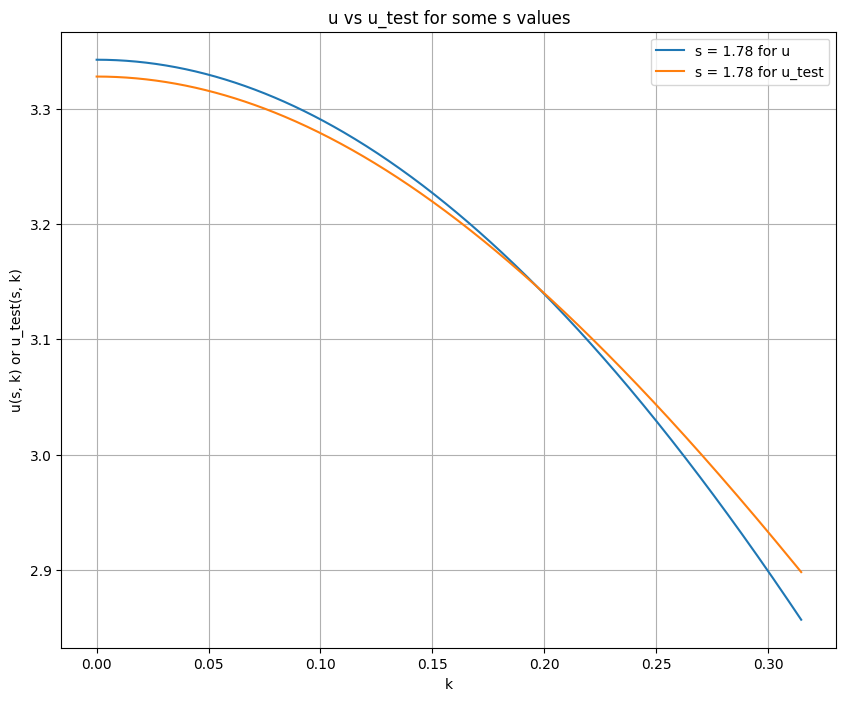

average difference for s = 2.18 : 0.012110321310837158


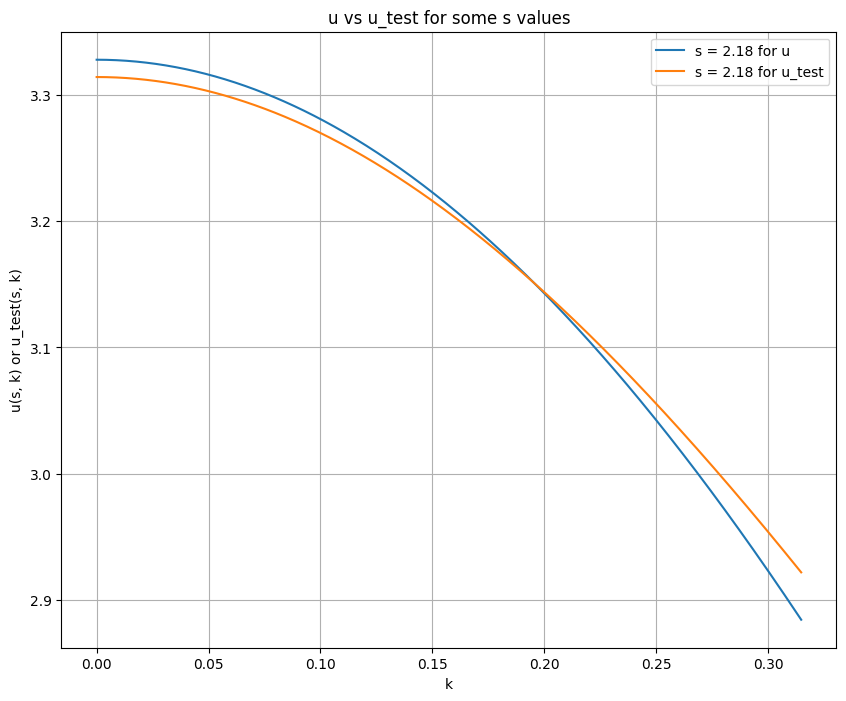

average difference for s = 2.58 : 0.011453582953027494


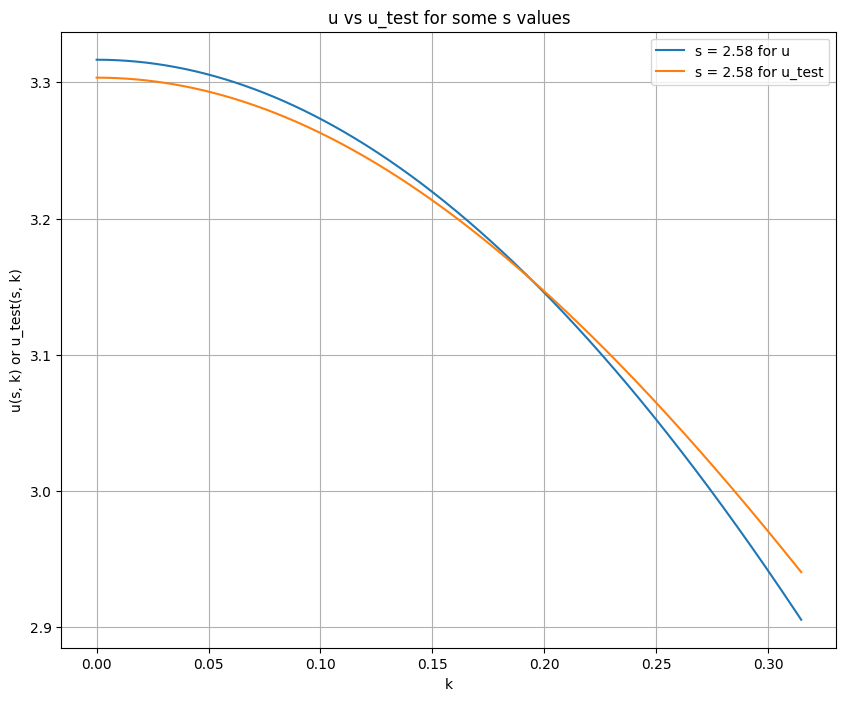

average difference for s = 2.97 : 0.011038099616931312


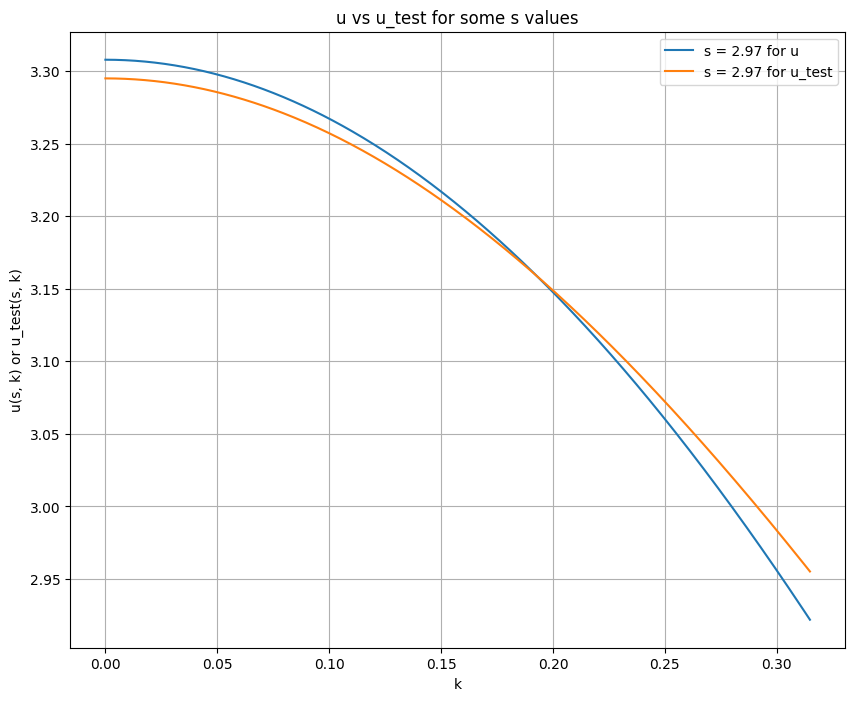

average difference for s = 3.37 : 0.010776816634636607


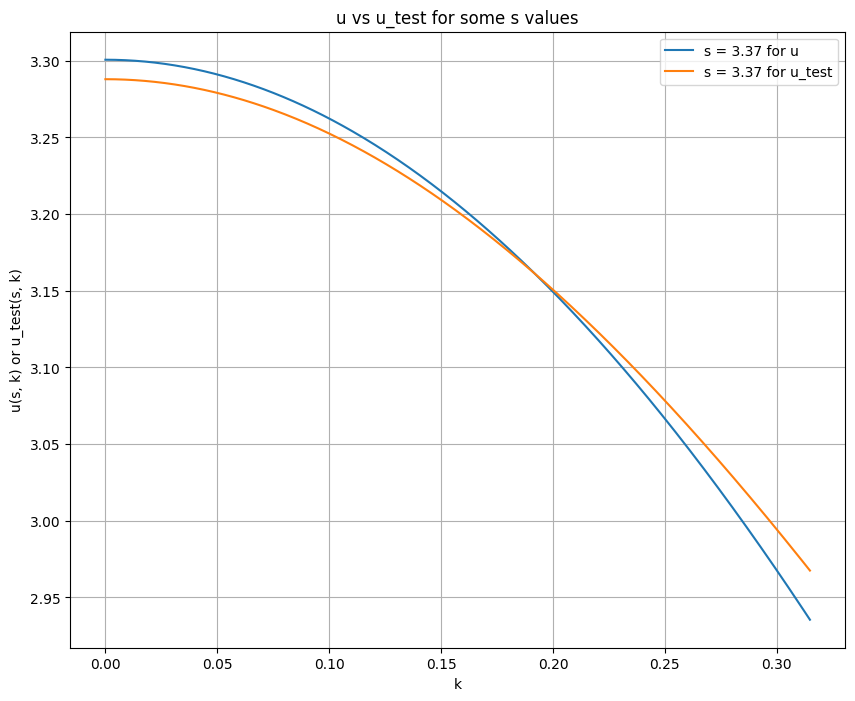

average difference for s = 3.76 : 0.010617040413098997


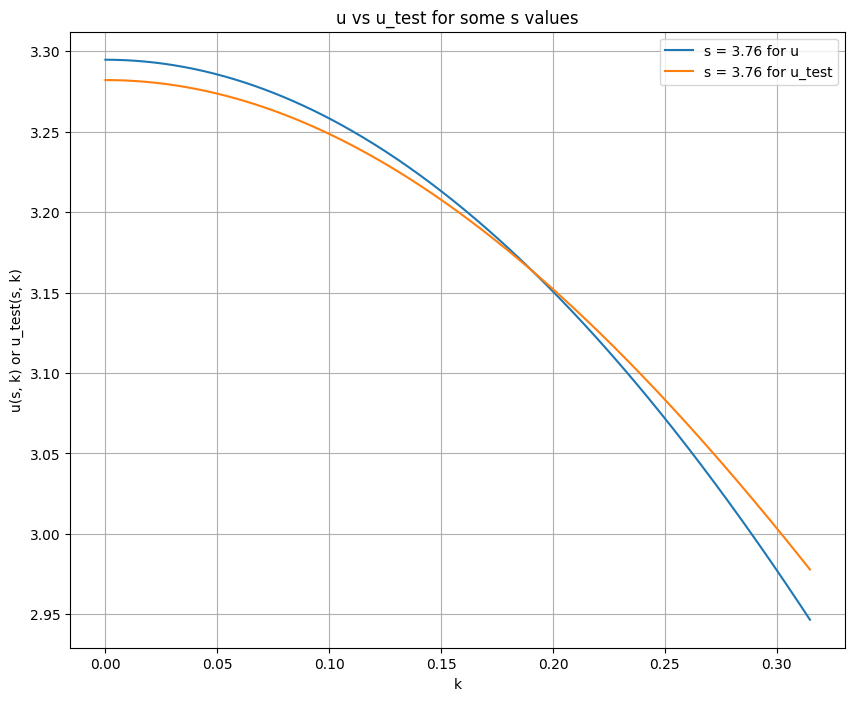

average difference for s = 4.16 : 0.01052599531209172


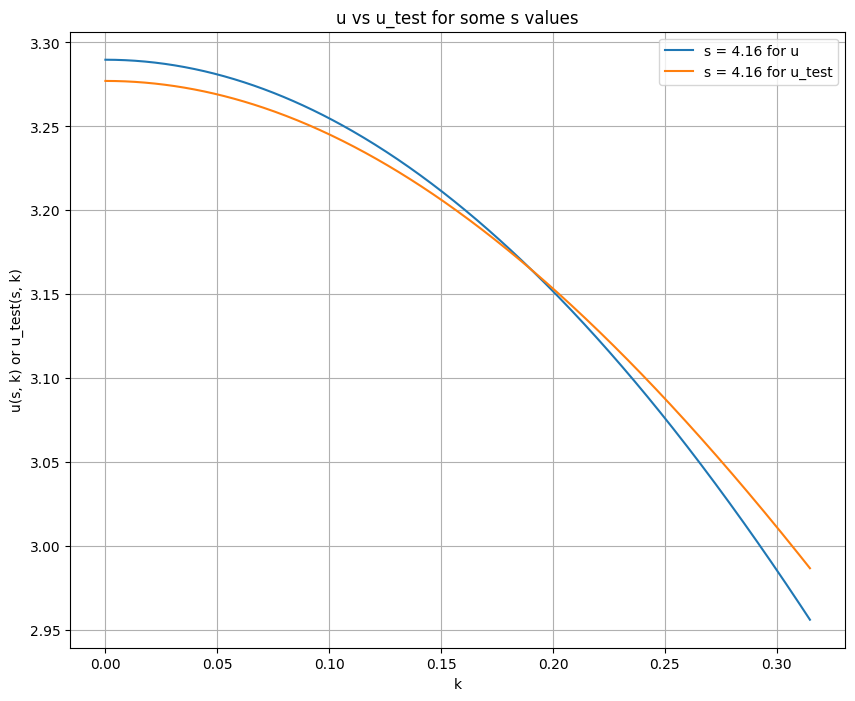

average difference for s = 4.56 : 0.010482710383648612


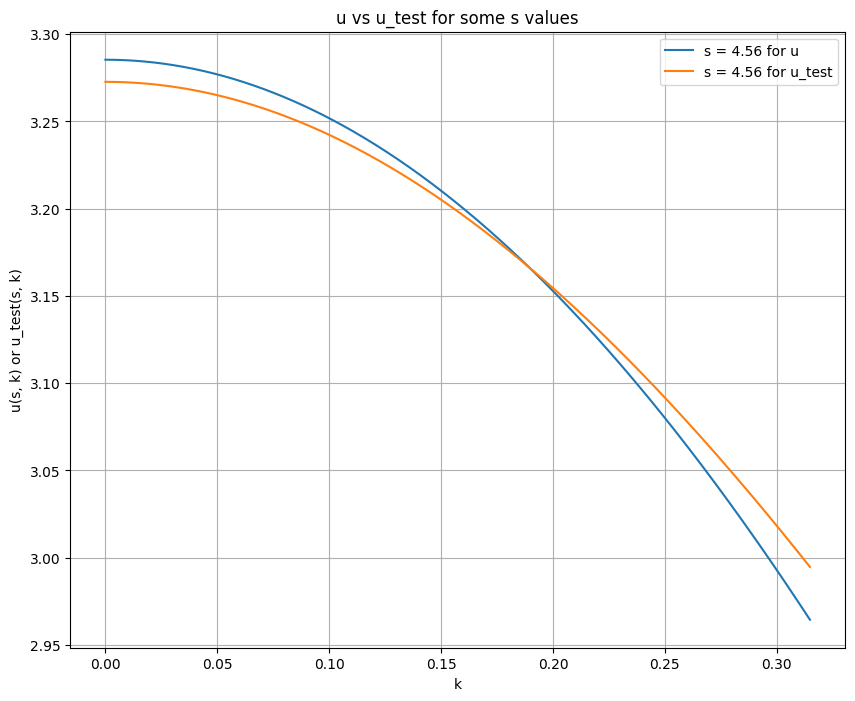

average difference for s = 4.95 : 0.010473257668990264


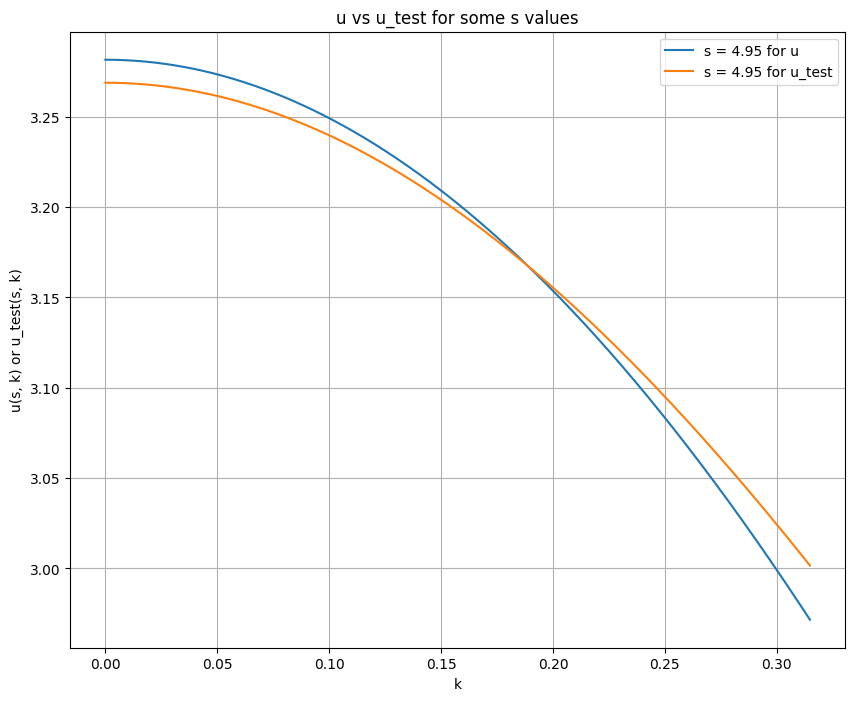

average difference for s = 5.35 : 0.010488093753085846


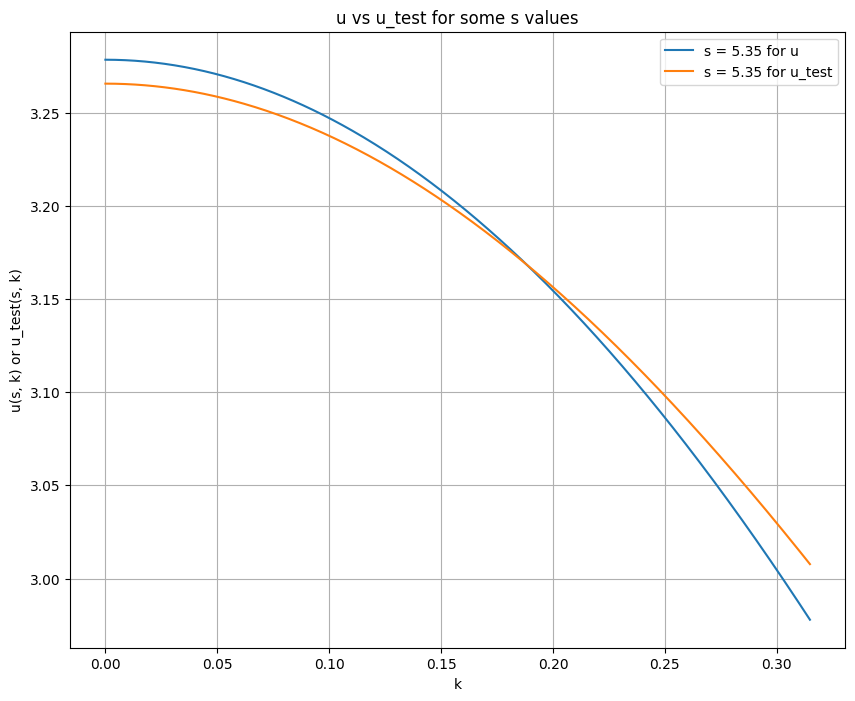

average difference for s = 5.74 : 0.010520514841100533


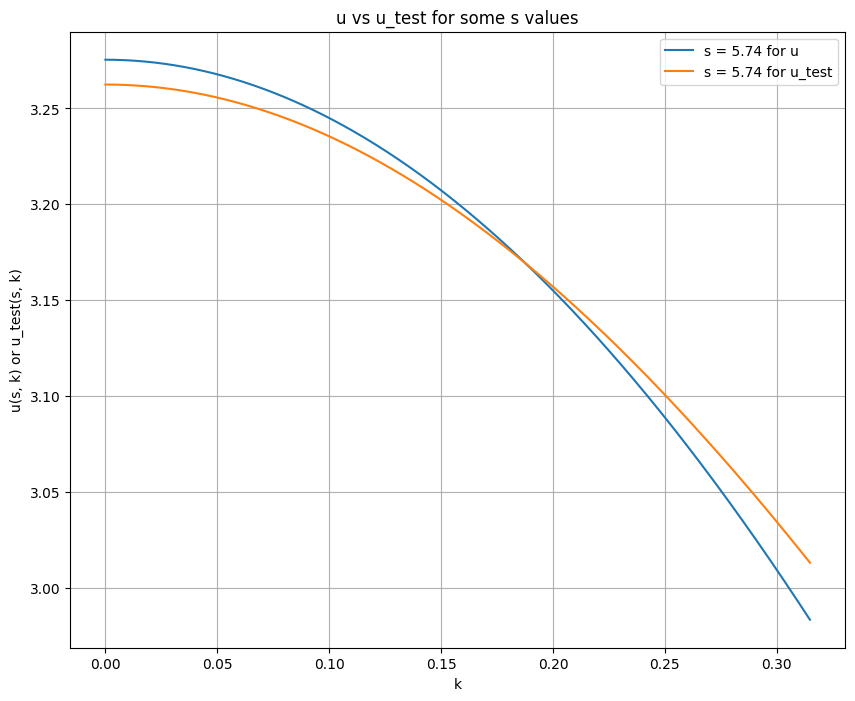

average difference for s = 6.14 : 0.010565711985334562


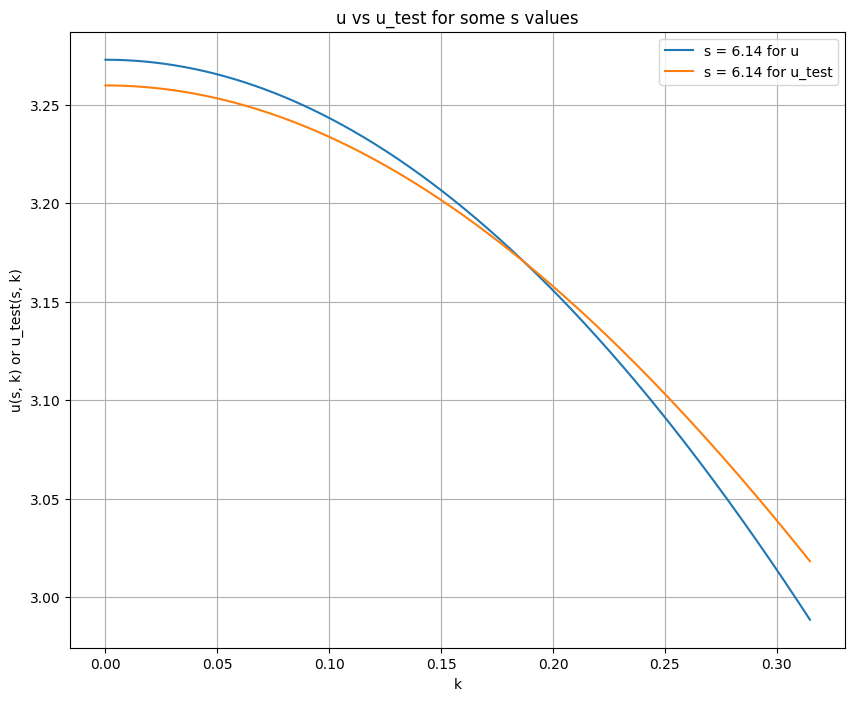

average difference for s = 6.54 : 0.010620250723124633


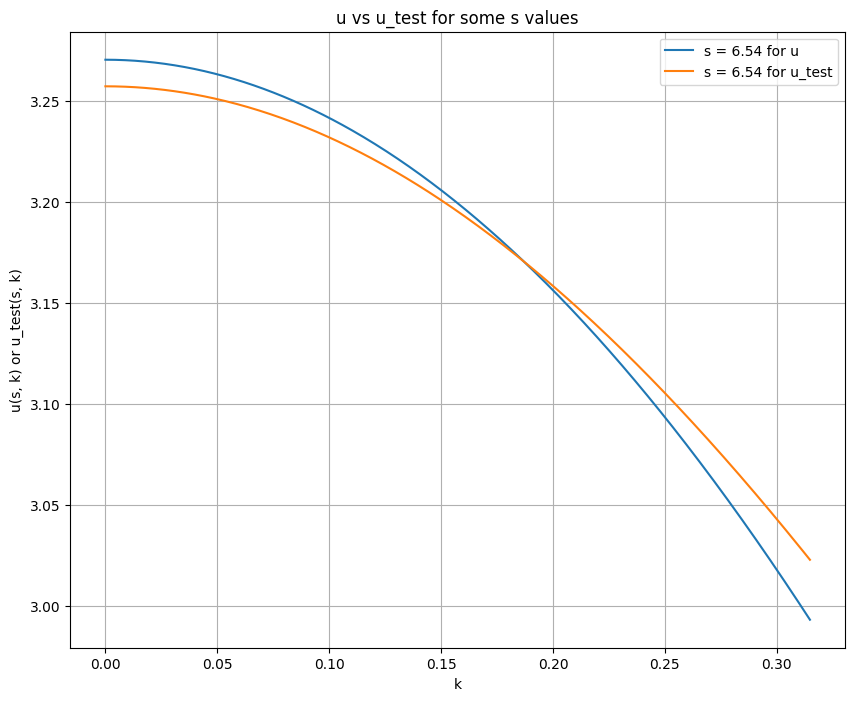

average difference for s = 6.93 : 0.01068154466193213


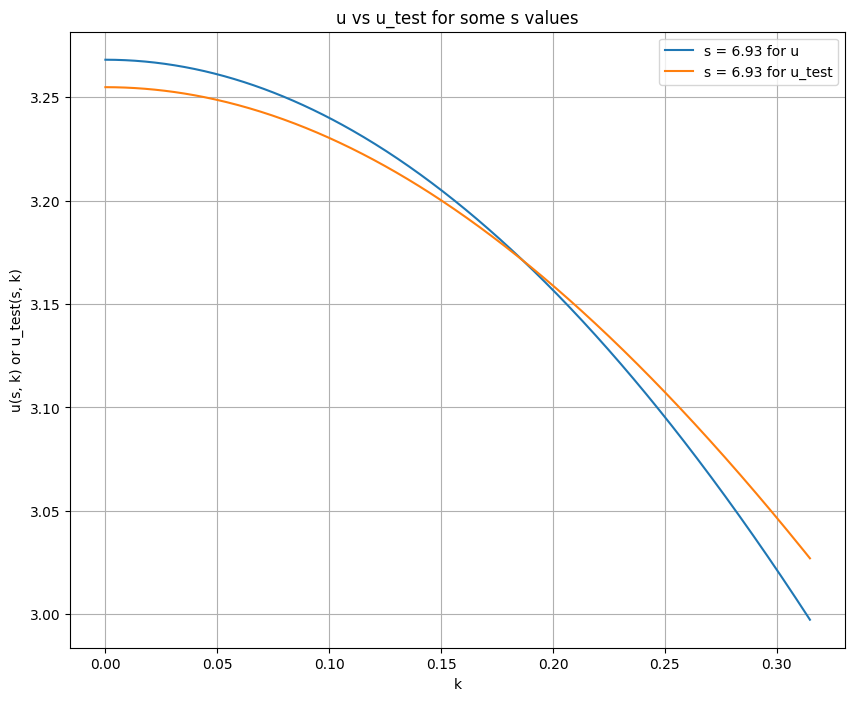

average difference for s = 7.33 : 0.01074762207400404


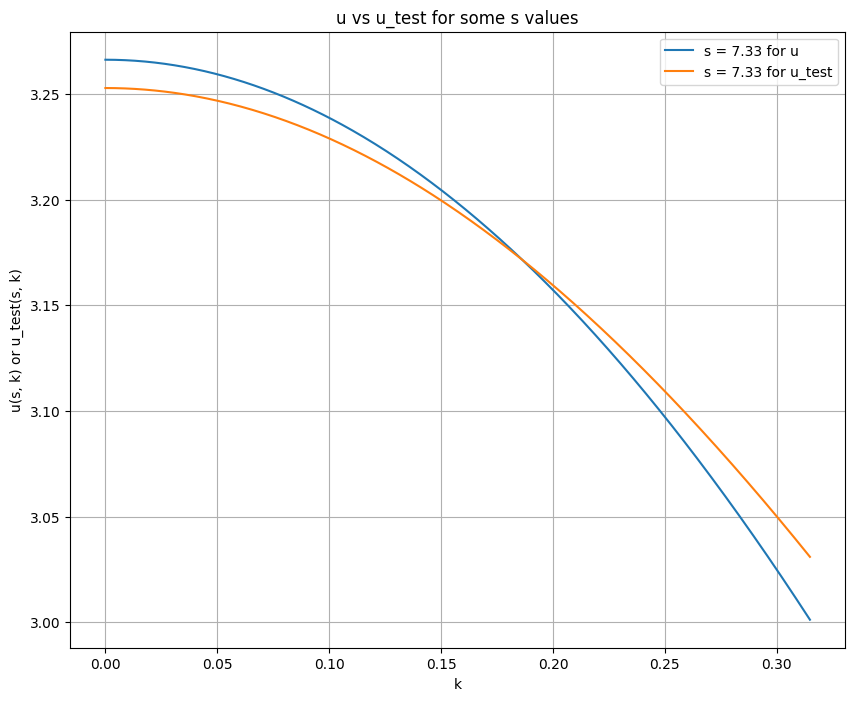

average difference for s = 7.72 : 0.010817103307372709


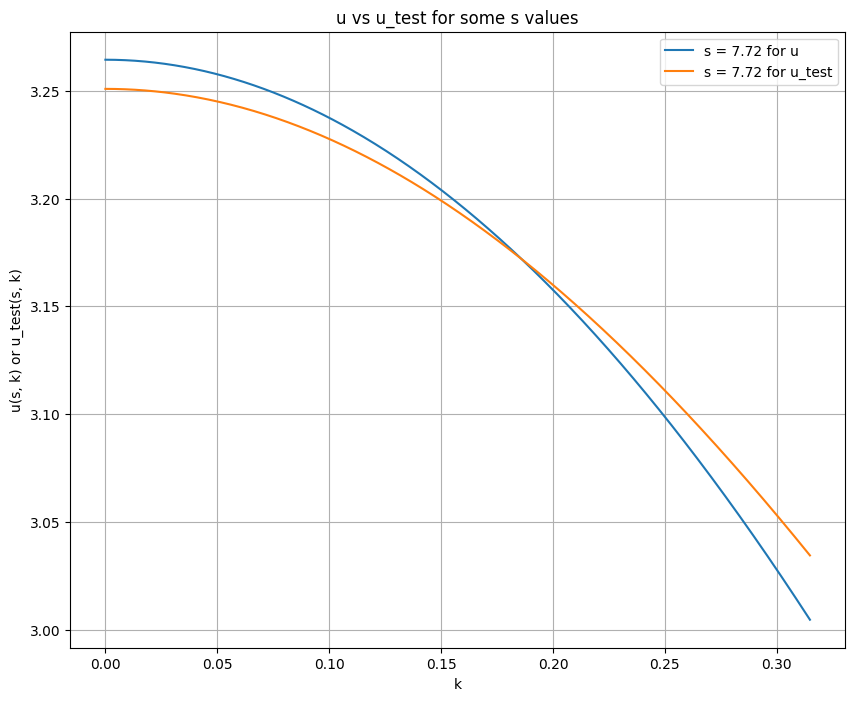

average difference for s = 8.12 : 0.010888815839609605


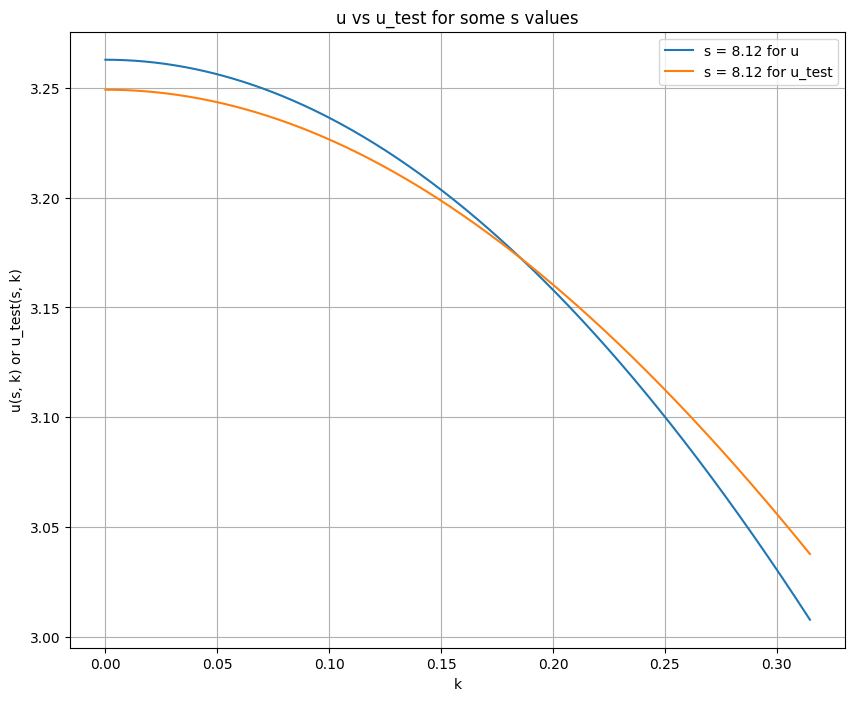

average difference for s = 8.52 : 0.010961912407210797


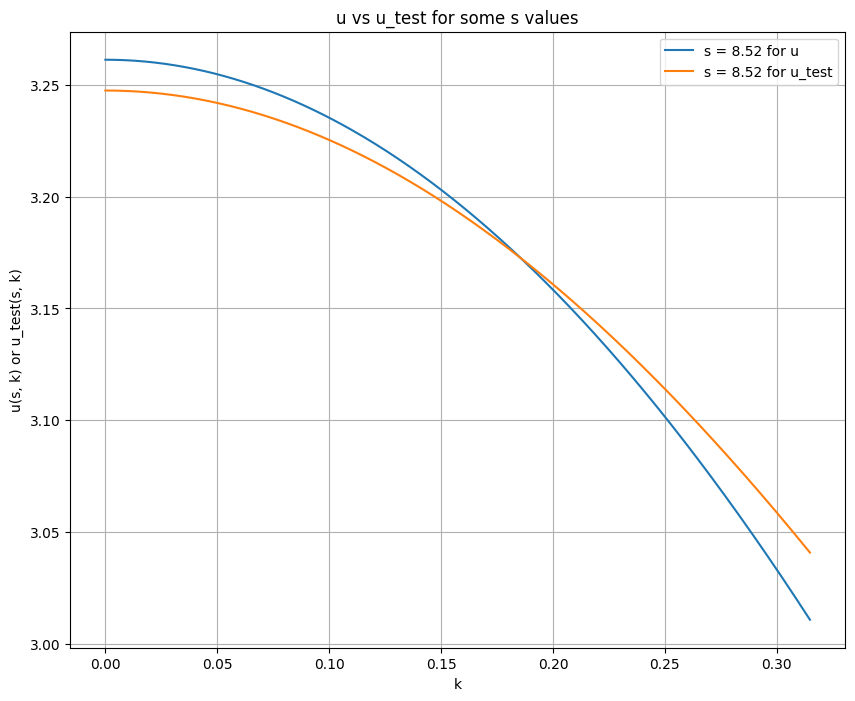

average difference for s = 8.91 : 0.011035806752654679


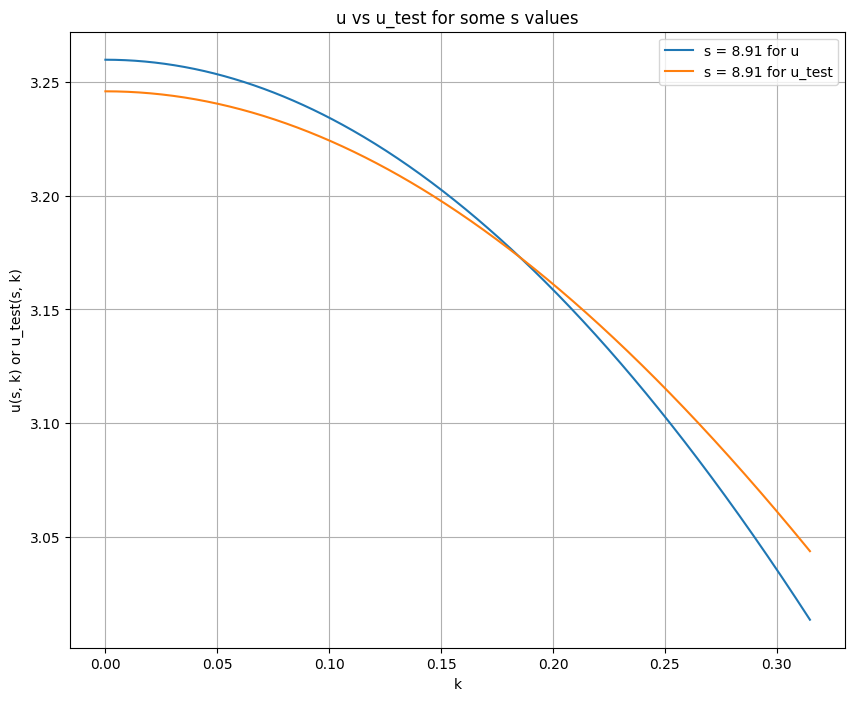

average difference for s = 9.31 : 0.011109894752054055


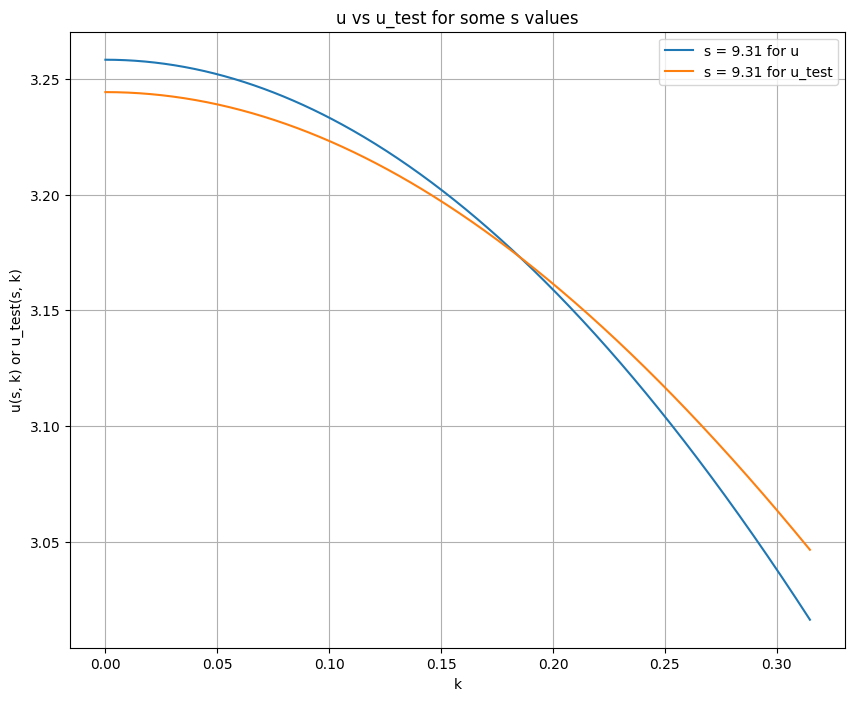

average difference for s = 9.70 : 0.011183806341420719


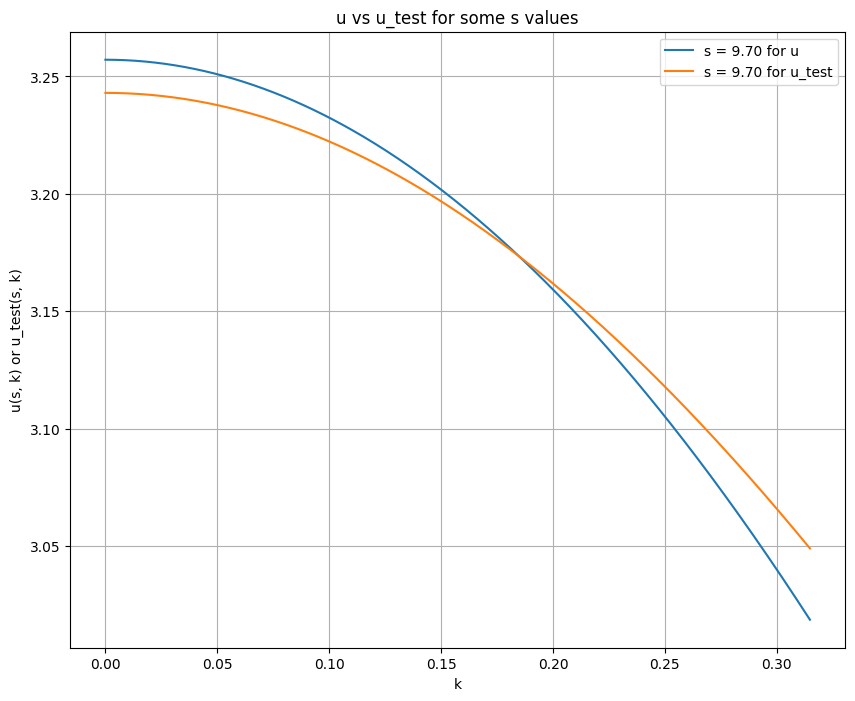

average difference for s = 10.10 : 0.011257320387421523


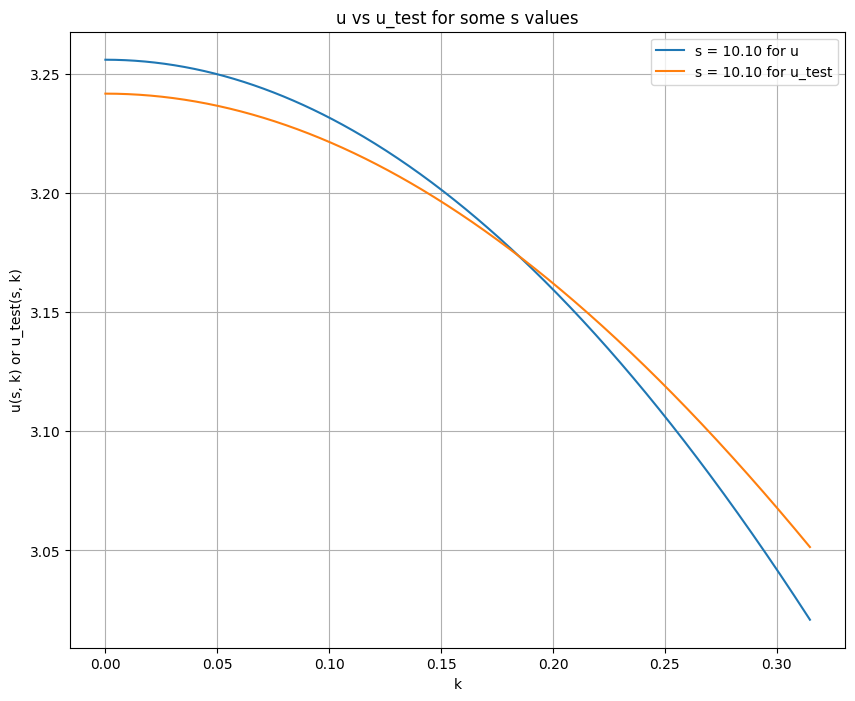

average difference for s = 10.50 : 0.011330107386212884


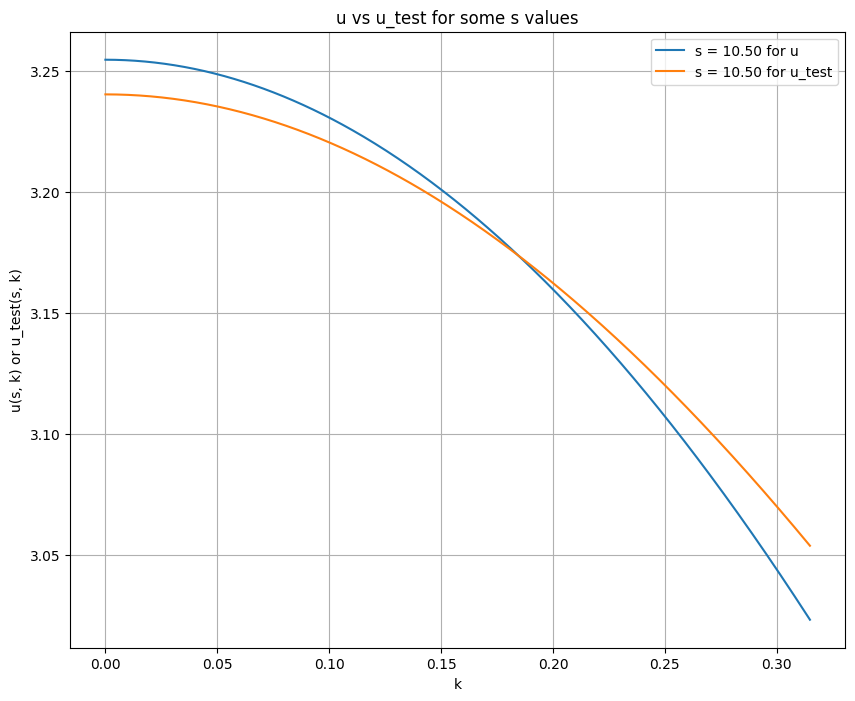

average difference for s = 10.89 : 0.011401990823270144


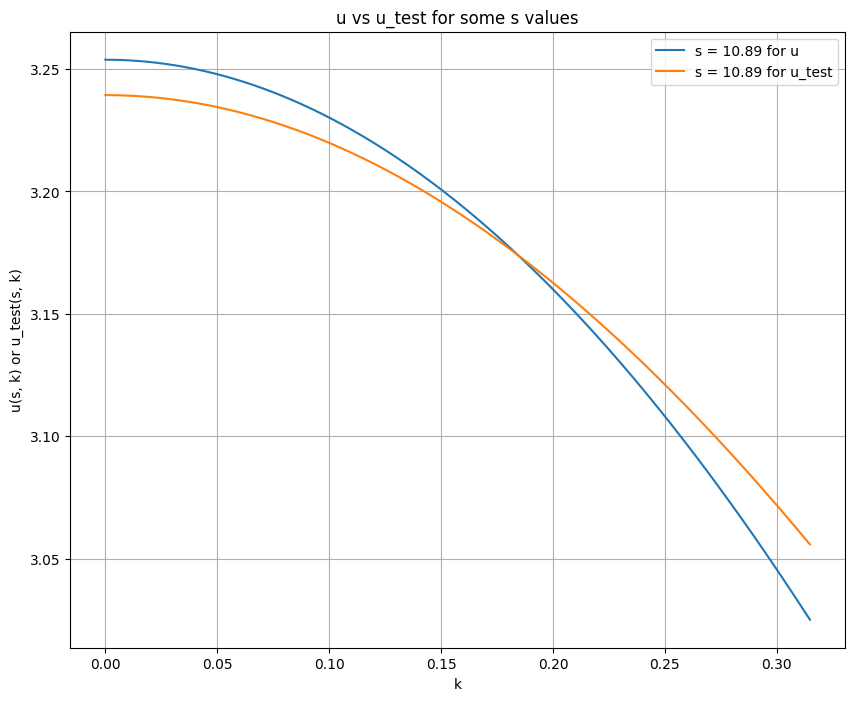

average difference for s = 11.29 : 0.011472836309389372


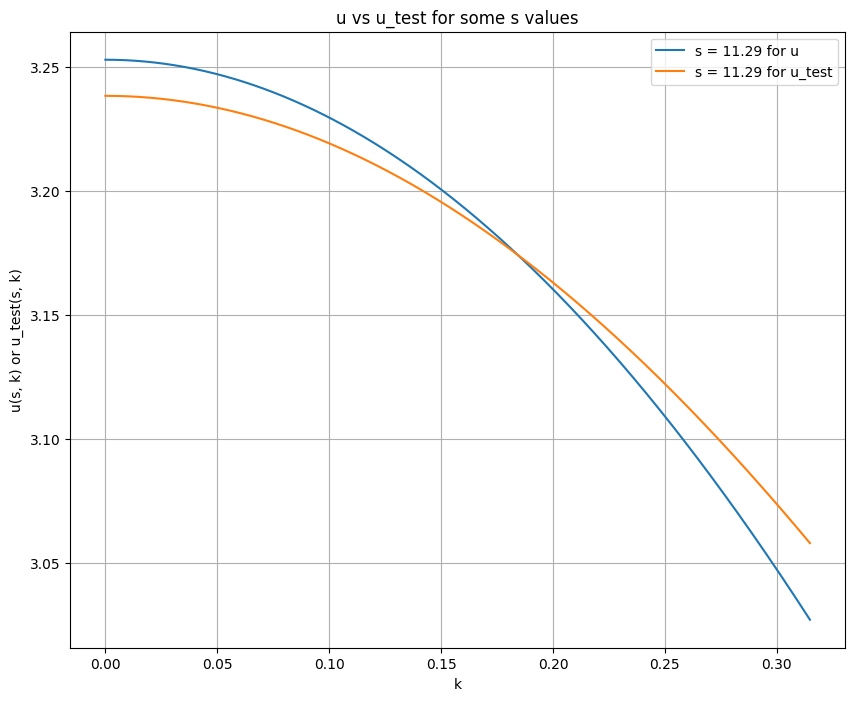

average difference for s = 11.68 : 0.011542610037284878


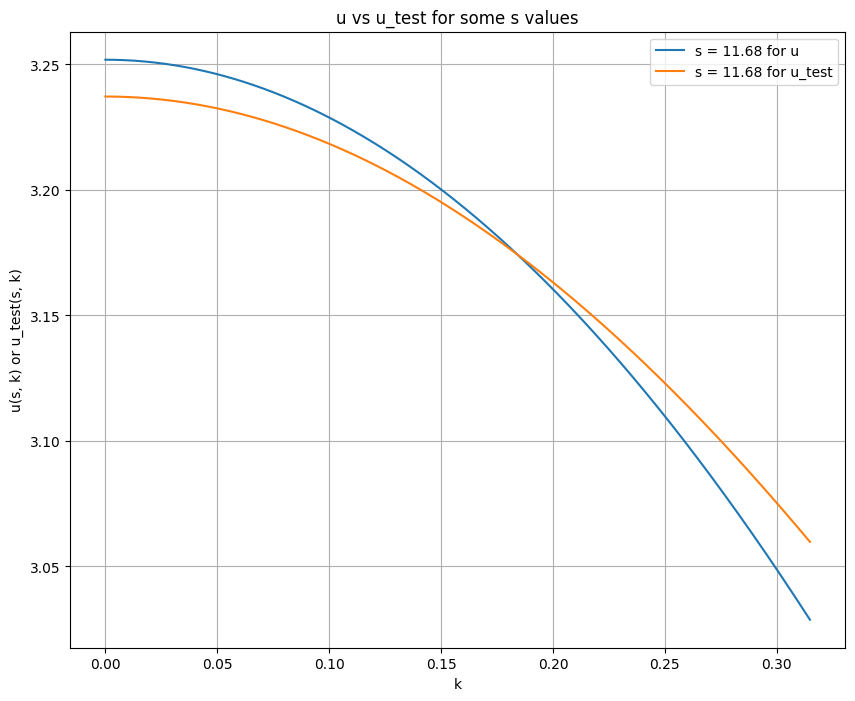

average difference for s = 12.08 : 0.011611178865399908


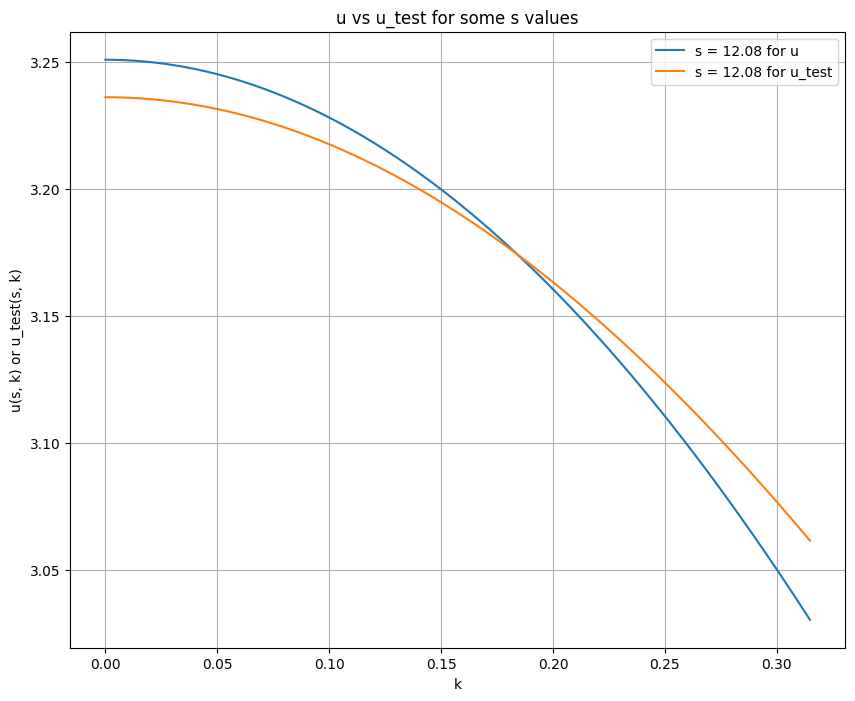

average difference for s = 12.48 : 0.011678477939355182


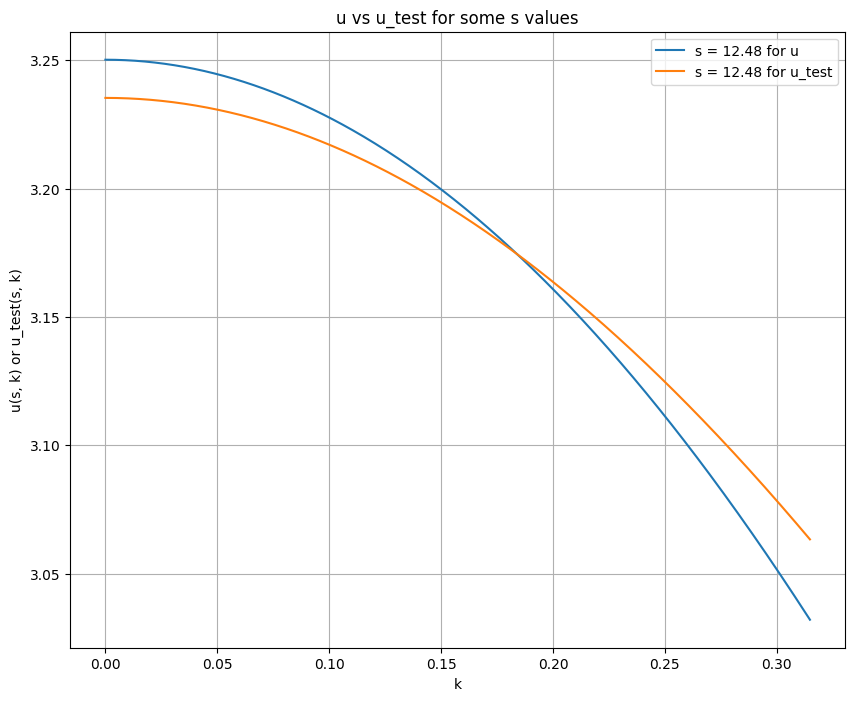

average difference for s = 12.87 : 0.011744472324352637


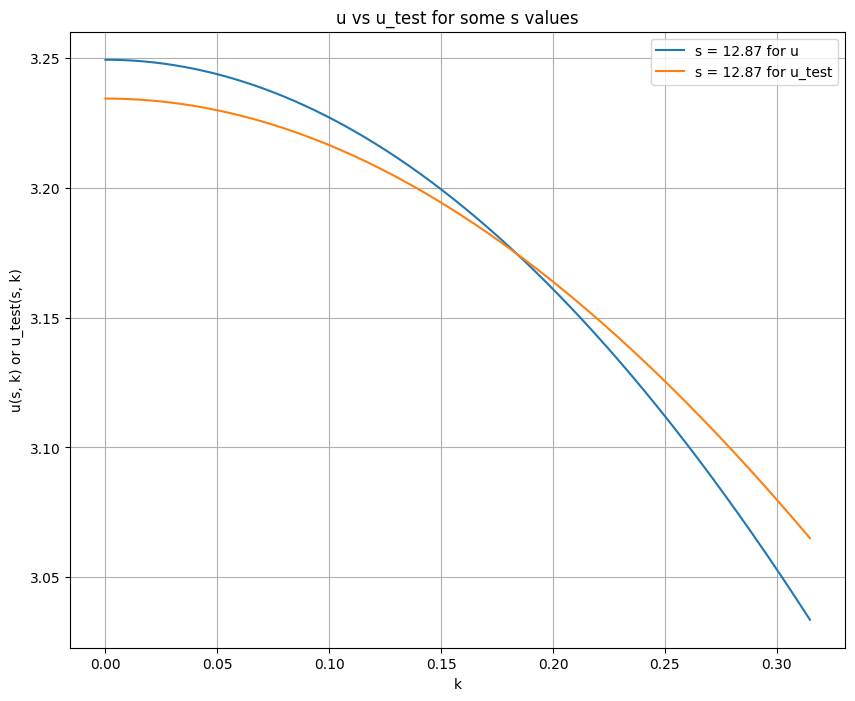

average difference for s = 13.27 : 0.011809140991145736


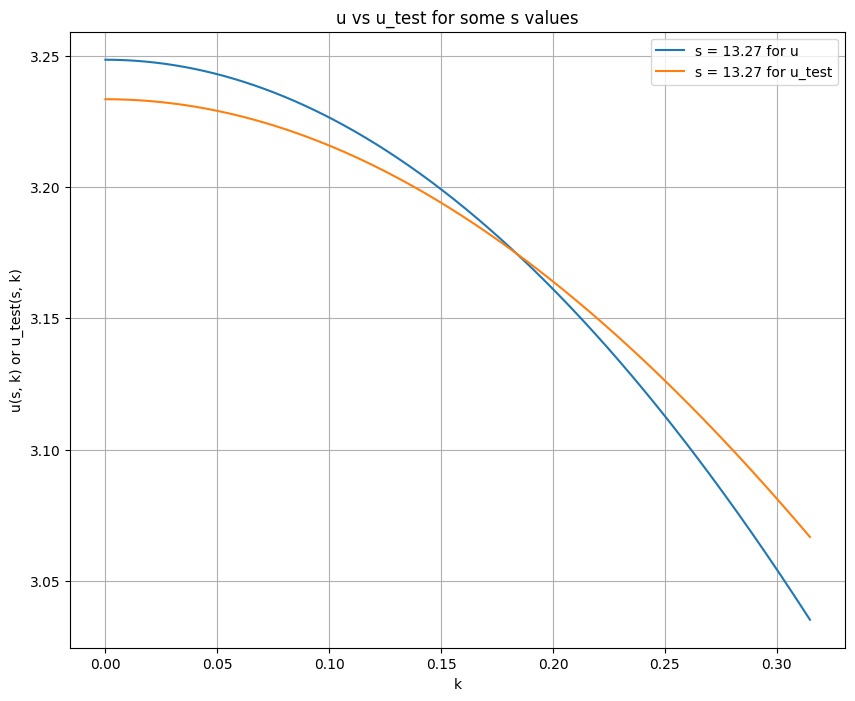

average difference for s = 13.66 : 0.011872474142053004


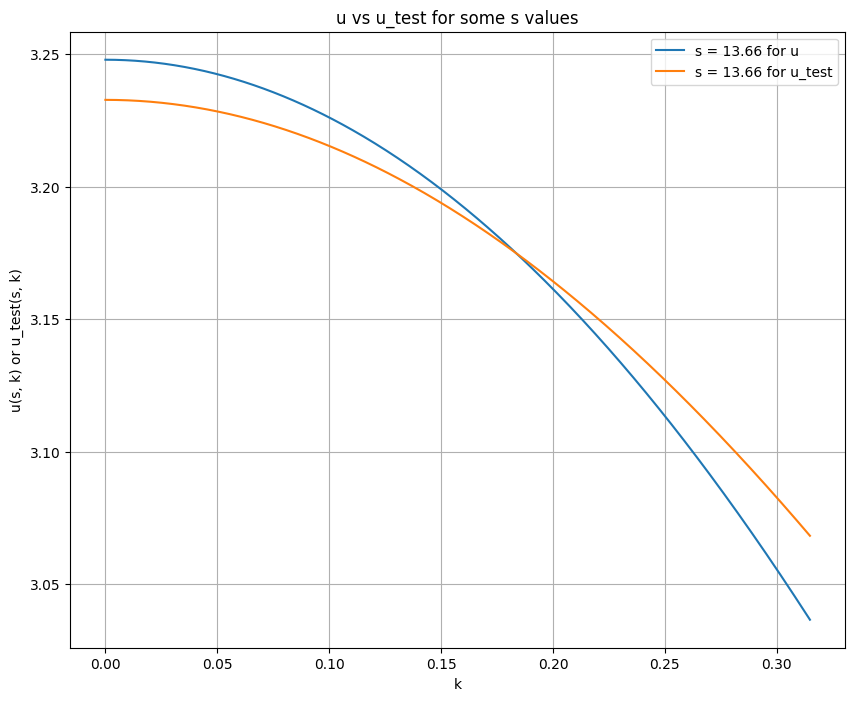

average difference for s = 14.06 : 0.011934499791907029


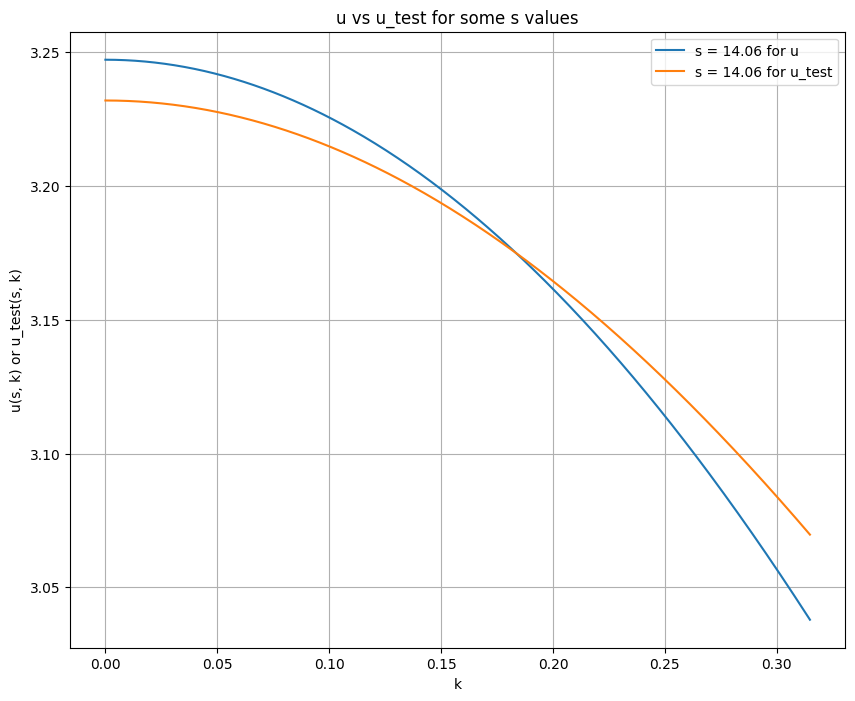

average difference for s = 14.46 : 0.011995218914241011


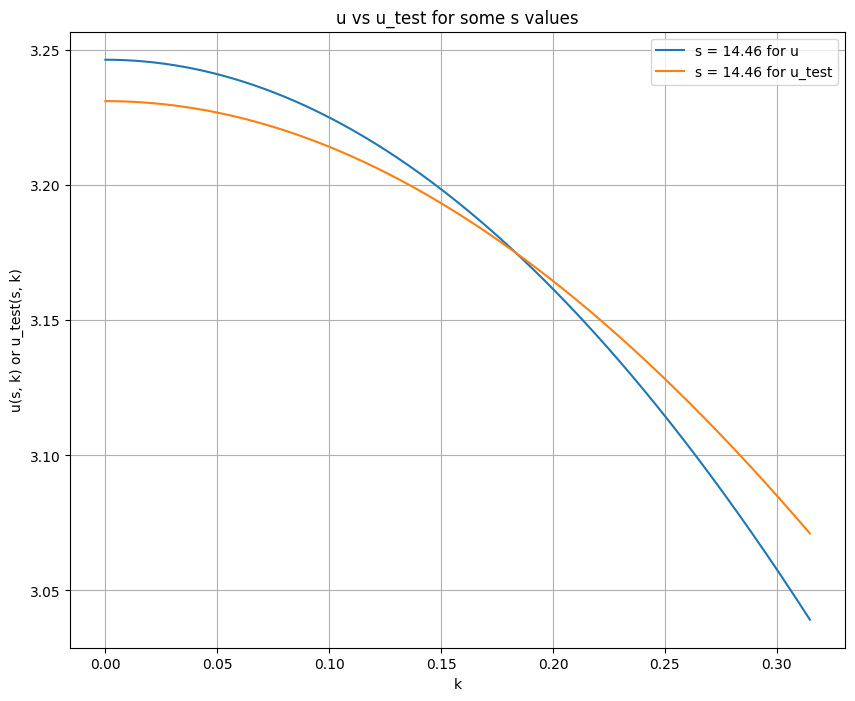

average difference for s = 14.85 : 0.012054618422963789


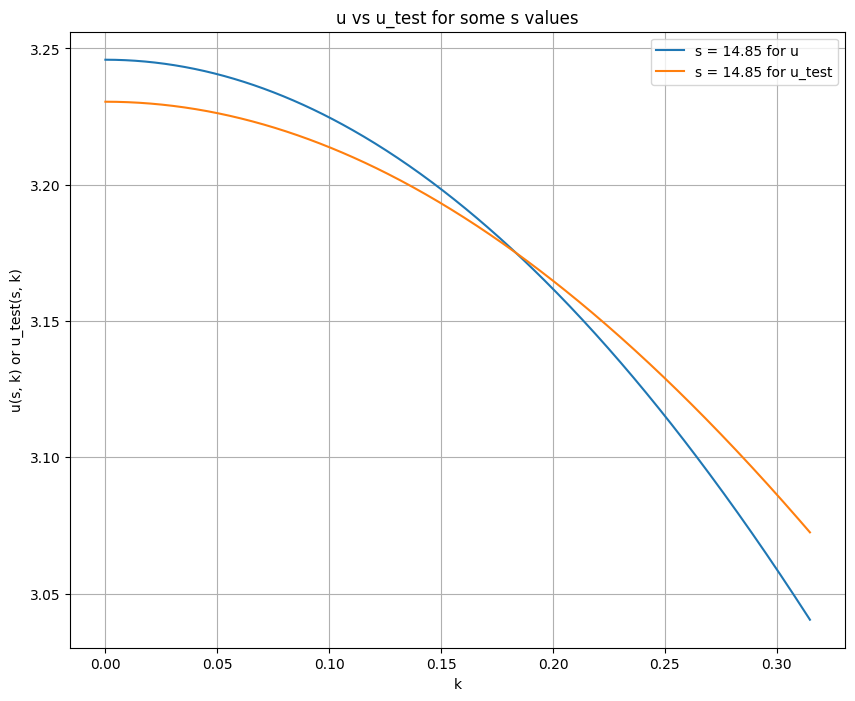

average difference for s = 15.25 : 0.012112715829763391


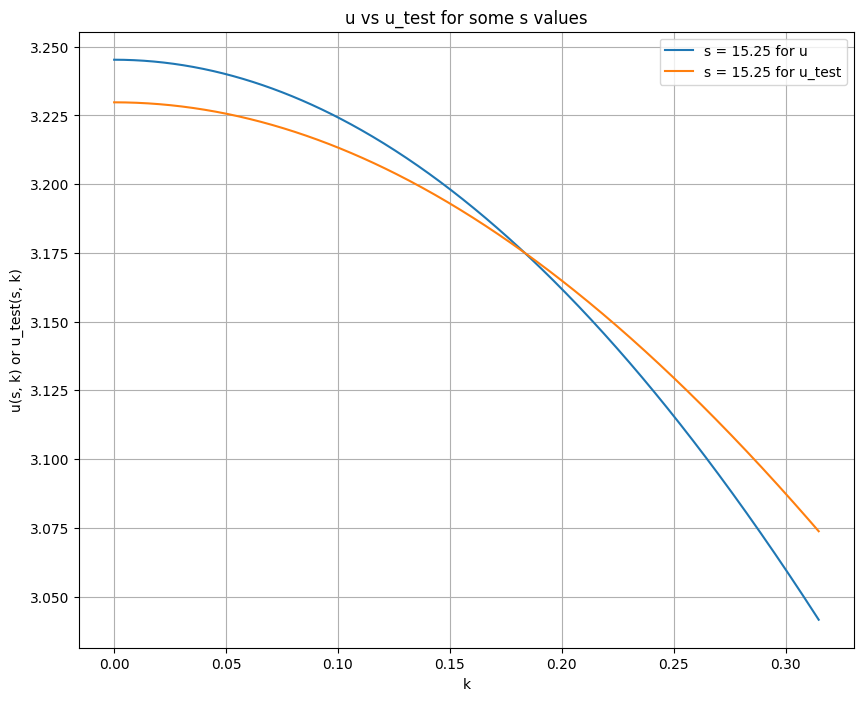

average difference for s = 15.64 : 0.012169532464385064


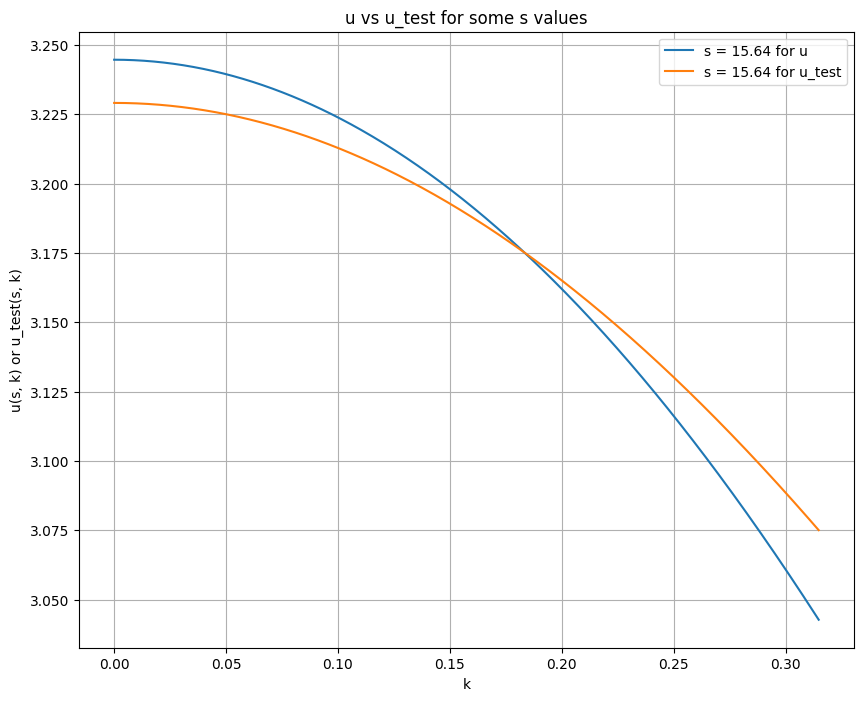

average difference for s = 16.04 : 0.01222509270454957


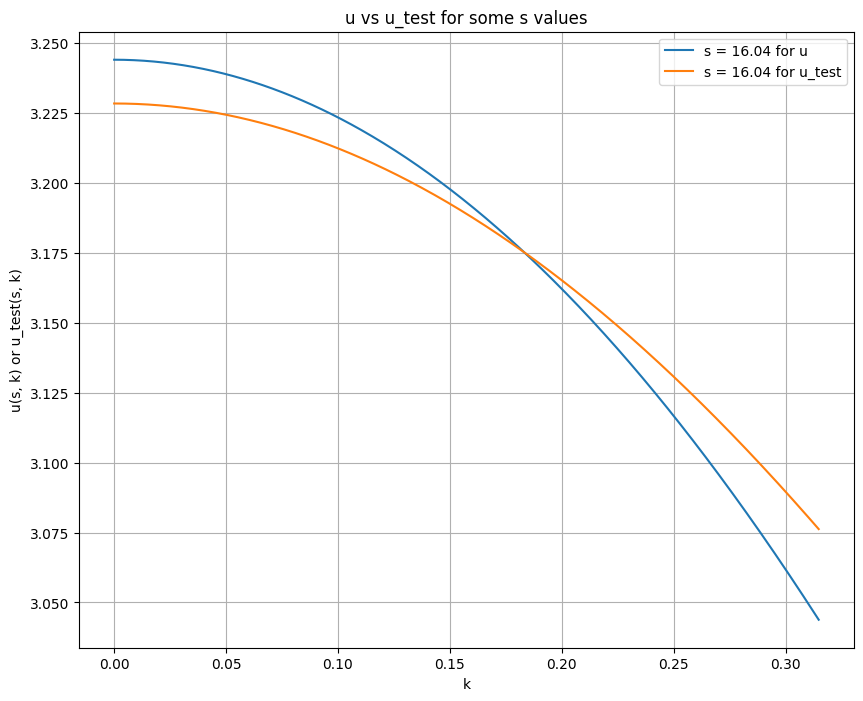

average difference for s = 16.44 : 0.012279423342203345


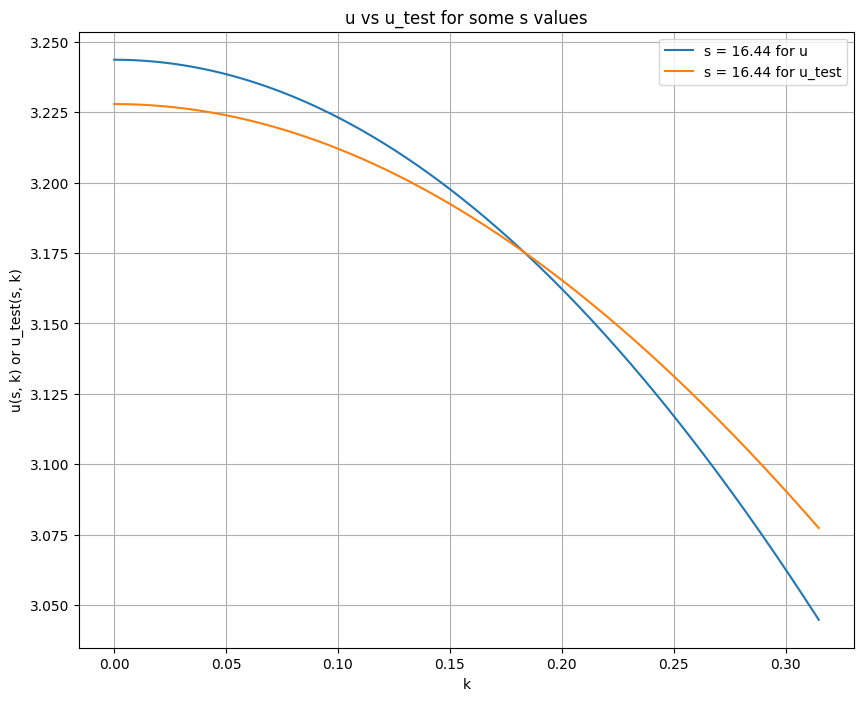

average difference for s = 16.83 : 0.012332553060476783


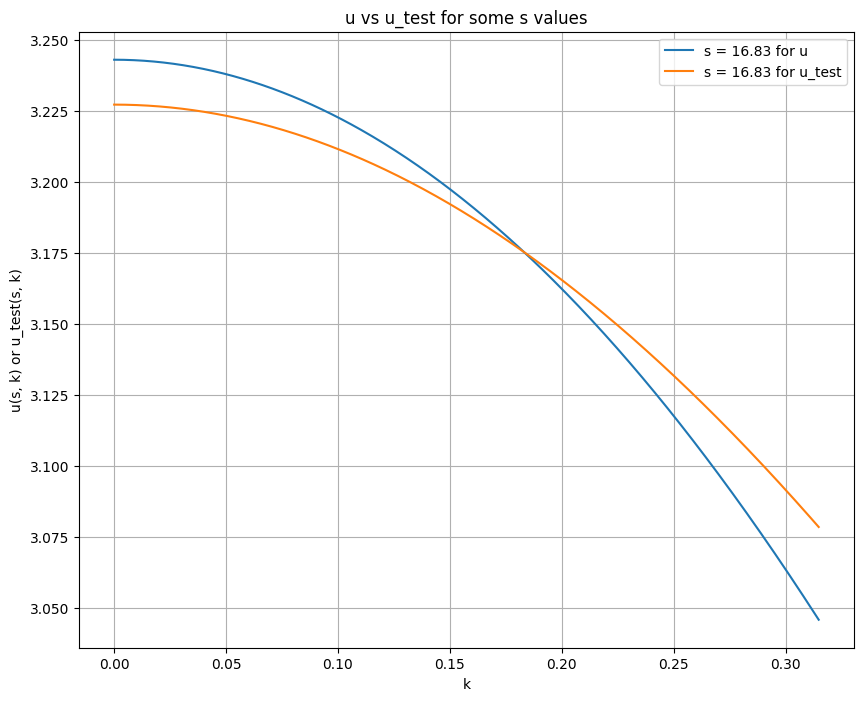

average difference for s = 17.23 : 0.012384512000864593


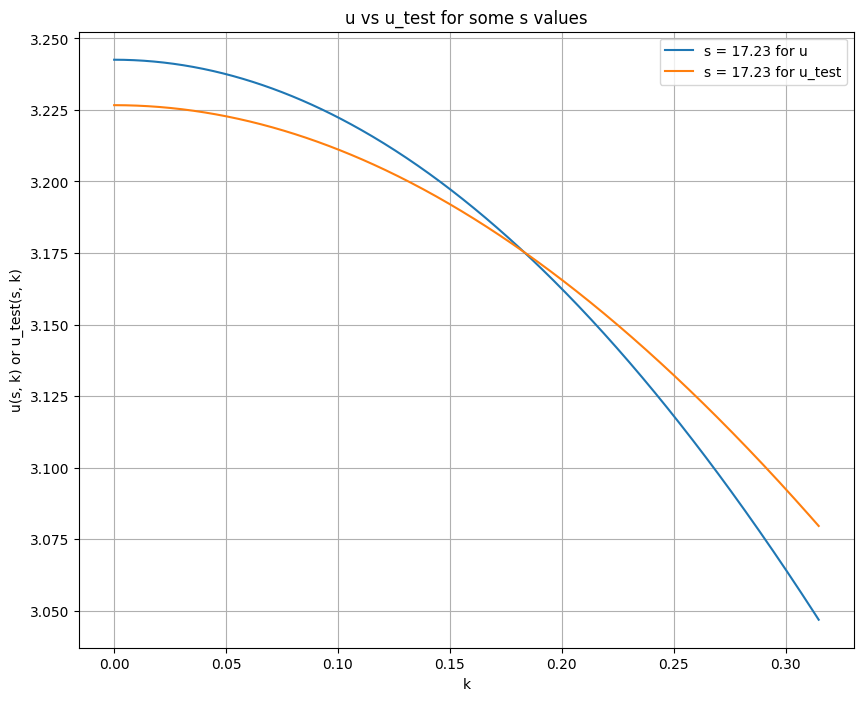

average difference for s = 17.62 : 0.01243533140419717


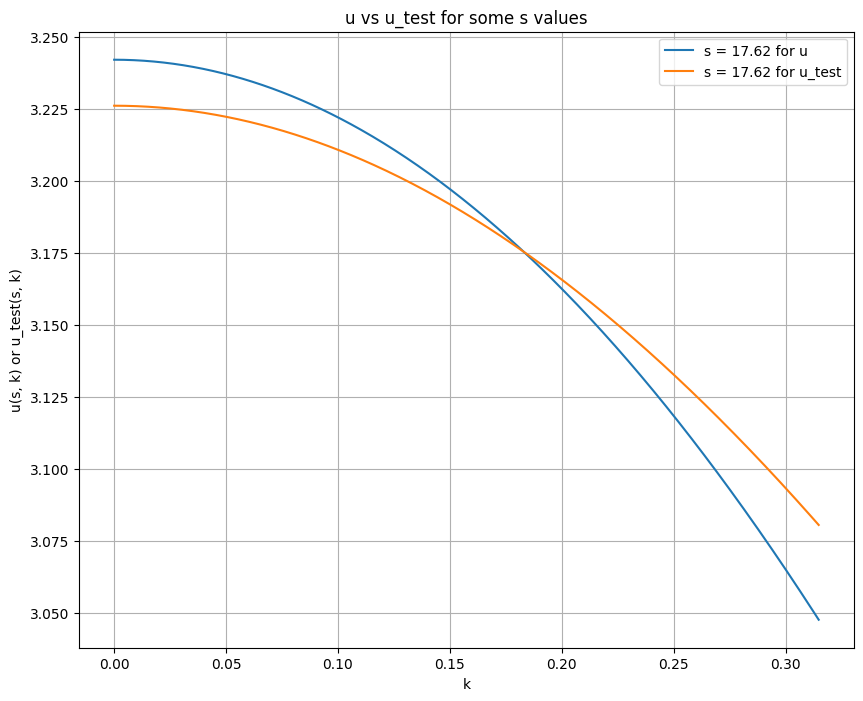

average difference for s = 18.02 : 0.012485043656902516


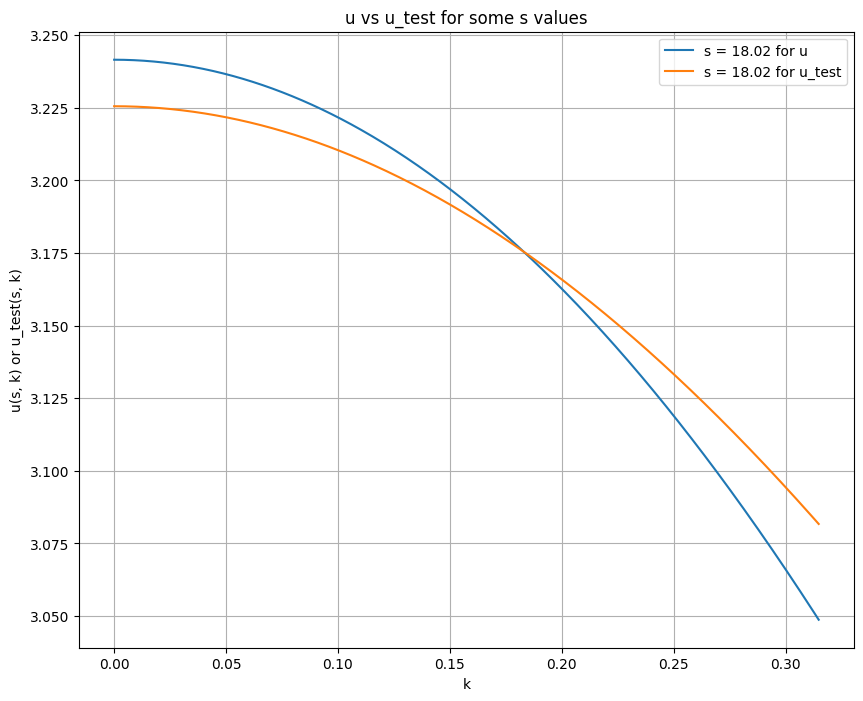

average difference for s = 18.42 : 0.012533711716370936


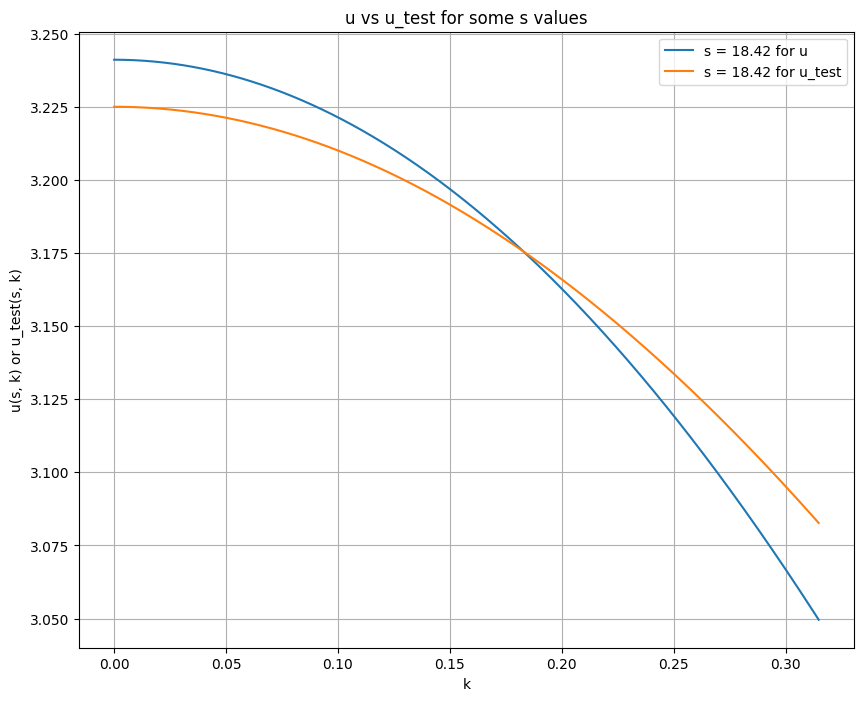

average difference for s = 18.81 : 0.012581336560410087


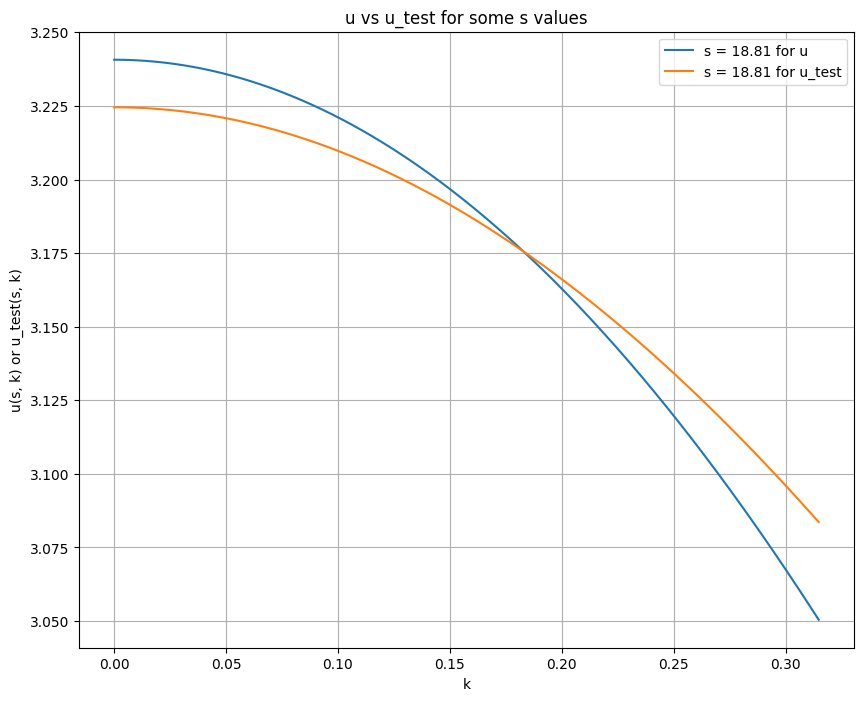

average difference for s = 19.21 : 0.012627951373147499


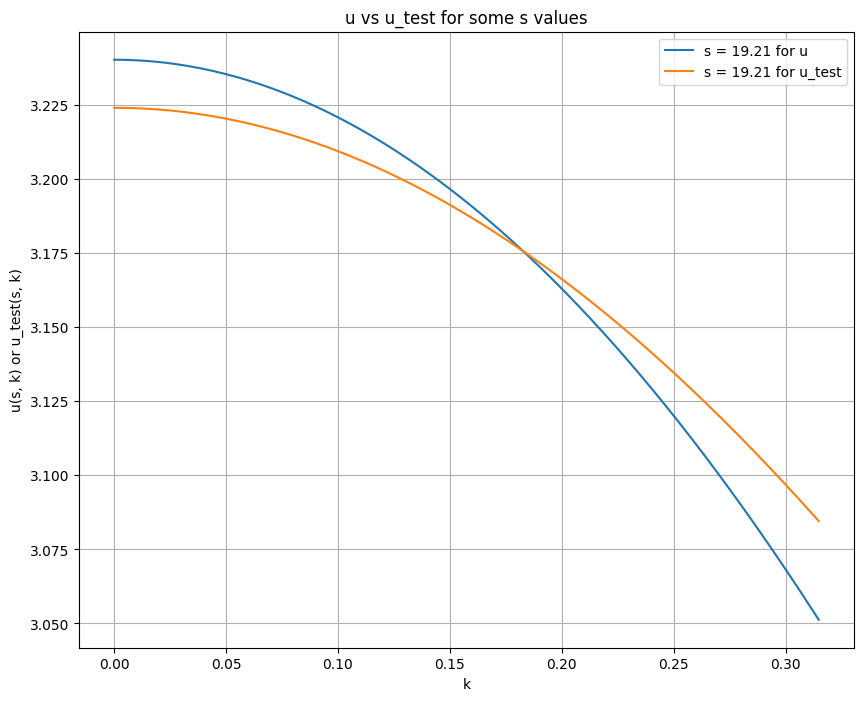

average difference for s = 19.60 : 0.01267358935921461


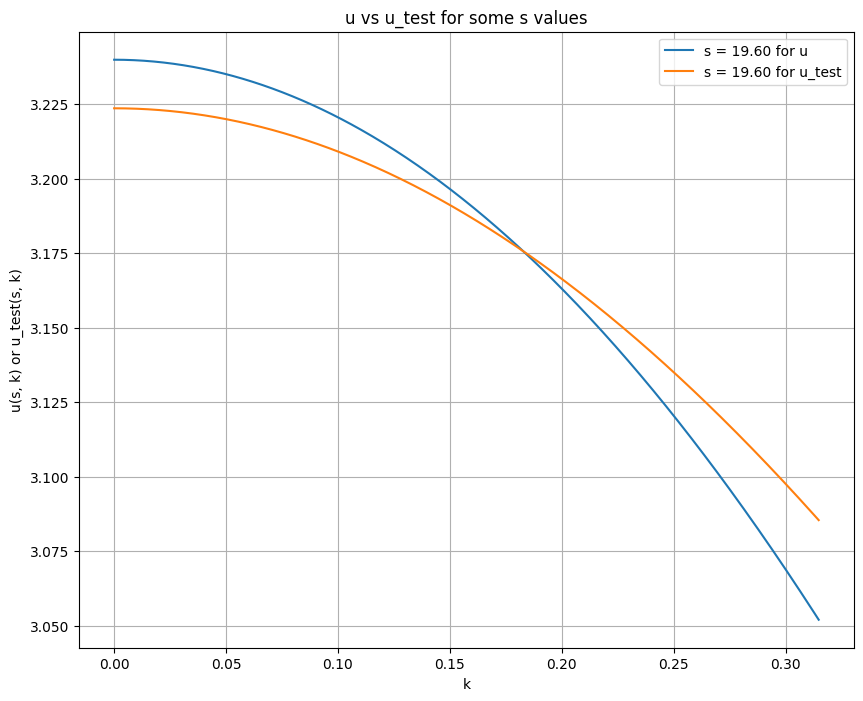

In [78]:
# compare u and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//50):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("k")
    plt.ylabel("u(s, k) or u_test(s, k)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(k_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()